 The best solution found:                                                                           
 [-0.00071372  0.05690534 -0.30982284 -0.07054024 -0.17854632  0.01953471
  0.04409477]

 Objective function:
 0.547535902779129


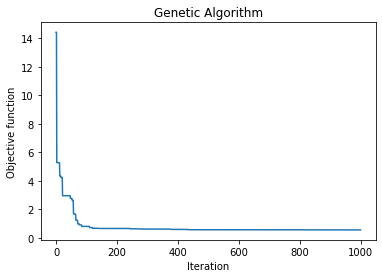

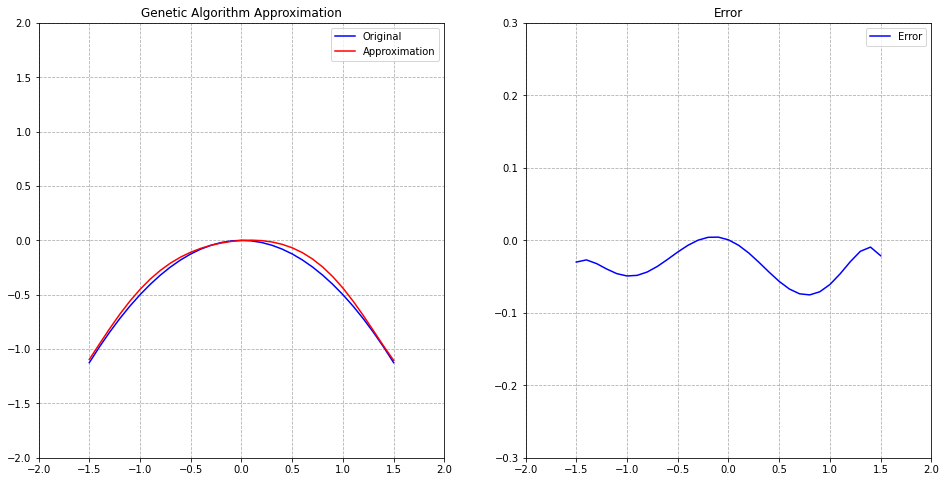

In [47]:
#################################################################################
# Генетические алгоритмы. Почитать про применение Г.А. в решении                #
# уравнений/диф.ур. Выбрать простой класс уравнений и для него воспроизвести    #
# результат. Т.е. построить решатель с помощью Г.А. Придумать метрику и         #
# проверить качество решателя                                                   #
#################################################################################

# Решение ОДУ первого порядка

import numpy as np
import matplotlib.pyplot as plt
import math
from geneticalgorithm import geneticalgorithm as ga

# Правая часть ОДУ #1
def F1(t, x):
    return math.cos(t);

# Правая часть ОДУ #2
def F2(t, x):
    return x ** 2 + 1;

# Правая часть ОДУ #3
def F3(t, x):
    return -t;

# Расчитывает значение полинома в точке
def evOrigin(polinom, t):
    value = 0
    for i in range(polinom.size):
        value += (t ** i) * polinom[i]
    return value

# Расчитывает значение производной полинома в точке
def evDerivative(polinom, t):
    value = 0
    for i in range(polinom.size - 1):
        value += (i + 1) * (t ** i) * polinom[i + 1]
    return value

# Функция ошибки
def error(F, T, t0, x0, polinom):
    error = 0
    for i in range(T.size):
        error += (evDerivative(polinom, T[i]) - F(T[i], evOrigin(polinom, T[i]))) ** 2
    error += (evOrigin(polinom, t0) - x0) ** 2
    error **= 0.5
    return error

# Выводит аппроксимацию функции
def drawApproximation(X, Y1, Y2, Err):
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(16)
    fig.set_figheight(8)
    ax[0].set_title('Genetic Algorithm Approximation')
    ax[1].set_title('Error')
    ax[0].axis([-2, 2, -2, 2])
    ax[1].axis([-2, 2, -0.3, 0.3])
    ax[0].grid(linestyle = '--')
    ax[1].grid(linestyle = '--')
    ax[1].plot(X, Err, 'blue', label='Error')
    ax[0].plot(X, Y1, 'blue', label='Original')
    ax[0].plot(X, Y2, 'red', label='Approximation')
    ax[0].legend()
    ax[1].legend()
    plt.show()

# Полезные константы
POLINOM_DEG = 7
N_GENERATION = 1000

# Дробление промежутка
T = np.arange(-1.5, 1.6, 0.1)

# Инициализация массивов
polinom = np.zeros(POLINOM_DEG)
etalonX = np.zeros(T.size)
approxX = np.zeros(T.size)
errorX = np.zeros(T.size)

# Функция приспособленности особей
fitness = lambda P : error(F3, T, 0, 0, P)

# Инициализируем параметры генетического алгоритма
varbound=np.array([[-1, 1]] * POLINOM_DEG)
algorithm_param = {'max_num_iteration': N_GENERATION,
                   'population_size':100,
                   'mutation_probability':0.07,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.2,
                   'crossover_type':'uniform',
                   'max_iteration_without_improv':None}
model=ga(function=fitness, 
         dimension=POLINOM_DEG, 
         variable_type='real', 
         variable_boundaries=varbound,
         algorithm_parameters=algorithm_param)

# Запускаем генетический алгоритм
model.run()

# Находим значения в точках всех функций
for i in range(T.size):
    # etalonX[i] = math.sin(T[i])
    # etalonX[i] = math.tan(T[i])
    etalonX[i] = -0.5 * T[i] ** 2
    approxX[i] = evOrigin(model.output_dict['variable'], T[i])
    errorX[i] = etalonX[i] - approxX[i]

# Рисуем график
drawApproximation(T, etalonX, approxX, errorX)

 The best solution found:                                                                           
 [-3.62054701  4.69367398 -0.13896718]

 Objective function:
 5.608014344520316


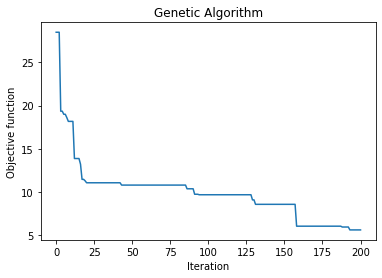

Original:
 [[-5.16700201]
 [ 5.68511066]
 [-0.06338028]]

Approximation:
 [-3.62054701  4.69367398 -0.13896718]


In [89]:
#################################################################################
# Генетические алгоритмы. Почитать про применение Г.А. в решении                #
# уравнений/диф.ур. Выбрать простой класс уравнений и для него воспроизвести    #
# результат. Т.е. построить решатель с помощью Г.А. Придумать метрику и         #
# проверить качество решателя                                                   #
#################################################################################

# Решение СЛНУ произвольного размера

import numpy as np
import matplotlib.pyplot as plt
import math
from geneticalgorithm import geneticalgorithm as ga

# Полезные константы
N_GENERATION = 200
N_DIMENSION = 3

# Инициализация системы
M = np.array([[2., 5., 33.], 
              [10., 11., 61.], 
              [8., 13., 9.]])
V = np.array([[16.], [7.], [32.]])
"""
M = np.array([[1., 6., 3.], 
              [11., 7., 6.], 
              [7., 8., 9.]])
V = np.array([[7.], [2.], [3.]])
"""
X = np.linalg.solve(M, V)

# Функция ошибки
def error(Y, M, V):
    err = 0
    temp = np.array([[0.]] * N_DIMENSION)
    for i in range(Y.size):
        temp[i][0] = Y[i]
    delta = M.dot(temp) - V
    for element in delta:
        err += abs(element[0])
    return err

# Функция приспособленности особей
fit = lambda Y : error(Y, M, V)

# Инициализируем параметры генетического алгоритма
varbound = np.array([[-10, 10]] * N_DIMENSION)
algorithm_param = {'max_num_iteration': N_GENERATION,
                    'population_size':100,
                    'mutation_probability':0.1,
                    'elit_ratio': 0.01,
                    'crossover_probability': 0.5,
                    'parents_portion': 0.3,
                    'crossover_type':'uniform',
                    'max_iteration_without_improv':None}

# Создаем объект, реализующий генетический алгоритм
model = ga(function = fit, 
           dimension = N_DIMENSION, 
           variable_type = 'real', 
           variable_boundaries = varbound,
           algorithm_parameters = algorithm_param)

# Запускаем генетический алгоритм
model.run()

# Выписываем решение СЛУ и его приближение
print('Original:\n', X)
print('\nApproximation:\n', model.output_dict['variable'])

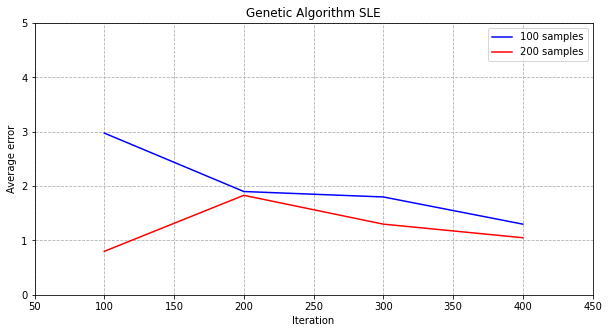

In [84]:
#################################################################################
# Генетические алгоритмы. Почитать про применение Г.А. в решении                #
# уравнений/диф.ур. Выбрать простой класс уравнений и для него воспроизвести    #
# результат. Т.е. построить решатель с помощью Г.А. Придумать метрику и         #
# проверить качество решателя                                                   #
#################################################################################

# Анализ точности работы алгоритма решения СЛНУ

import numpy as np
import matplotlib.pyplot as plt
import math
from geneticalgorithm import geneticalgorithm as ga

# Полезные константы
N_DIMENSION = 3

# Инициализация системы
"""
M = np.array([[2., 5., 33., 9, 1], 
              [10., 11., 61., 2, 1], 
              [8., 13., 9., 5, 34], 
              [8., 5., 2., 5, 33], 
              [0., 13., 87., 5, 3]])
V = np.array([[16.], [7.], [32.], [2], [11]])
"""
"""
M = np.array([[1., 6., 3.], 
              [11., 7., 6.], 
              [7., 8., 9.]])
V = np.array([[7.], [2.], [3.]])
"""
M = np.array([[2., 5., 33.], 
              [10., 11., 61.], 
              [8., 13., 9.]])
V = np.array([[16.], [7.], [32.]])
X = np.linalg.solve(M, V)

# Функция ошибки
def error(Y, M, V):
    err = 0
    temp = np.array([[0.]] * N_DIMENSION)
    for i in range(Y.size):
        temp[i][0] = Y[i]
    delta = M.dot(temp) - V
    for element in delta:
        err += abs(element[0])
    return err

# Выводит информацию об эффективности
def drawError(Gen, Err100, Err200):
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(5)
    ax.set_title('Genetic Algorithm SLE')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Average error')
    ax.axis([50, 450, 0, 5])
    ax.grid(linestyle = '--')
    ax.plot(Gen, Err100, 'blue', label='100 samples')
    ax.plot(Gen, Err200, 'red', label='200 samples')
    ax.legend()
    plt.show()

# Функция приспособленности особей
fit = lambda Y : error(Y, M, V)

# Среднее отклонение результата вычислений от эталонного ответа
def averageError(repeat, model, X):
    err = 0
    for i in range(repeat):
        model.run()
        for j in range(X.size):
            err += abs(X[j][0] - model.output_dict['variable'][j])
    err /= repeat
    return err

# Формирует результаты эффективности генетического алгоритма
def efficiency(nSamples, Gen, X):
    error = np.zeros(Gen.size)
    for i in range(Gen.size):
        # Инициализируем параметры генетического алгоритма
        varbound = np.array([[-10, 10]] * N_DIMENSION)
        algorithm_param = {'max_num_iteration': Gen[i],
                           'population_size':nSamples,
                           'mutation_probability':0.1,
                           'elit_ratio': 0.01,
                           'crossover_probability': 0.5,
                           'parents_portion': 0.3,
                           'crossover_type':'uniform',
                           'max_iteration_without_improv':None}
        # Создаем объект, реализующий генетический алгоритм
        model = ga(function = fit, 
                   dimension = N_DIMENSION, 
                   variable_type = 'real', 
                   variable_boundaries = varbound,
                   algorithm_parameters = algorithm_param)
        error[i] = averageError(5, model, X)
    return error

# Формируем статистику
Gen = np.array([100, 200, 300, 400])
Err100 = np.array([2.975, 1.9, 1.8, 1.3])
Err200 = np.array([0.8, 1.83, 1.3, 1.05])
#Err100 = efficiency(100, Gen, X)
#Err200 = efficiency(200, Gen, X)

# Рисуем график статистики
drawError(Gen, Err100, Err200)